#Intro

The point of this note is to compare the measured and the expected power by the GIGAS detector.

We will have to review the electronics itself, the installation process and then look at the baseline level.

This is not intented to give a precise absolute calibration but only to verify the order of magnitude.
This is especially interesting for the Helix antenna since they seem to be quite unsensitive.

To compute the expected power, we will use simulated (for the antenna temperature for instance) or quoted value i.e. from data sheet (for LNA teperature of gain).

#GIGAS Electronics

The electronics of GIGAS, like the one of EASIER is composed of :

- LNA
- power detection
- adaptation

When EASIER's electronics was mainly connectored component, the GIGAS's one is mostly integrated.
The principle remains the same, after the amplification done by the LNA, 
the MW signal is transformed into a DC voltage level proportional to the log10 of its power.
The slope for this proportional relation is fixed and the offset is adjustable with a adujstable resistor.
At last Auger's front end electronics divides the DC voltage, filters below 20MHz, and digitizes at 40MS/s.


The important relation is the one connecting the MW power after the antenna to the final ADC count number.
This relation is easy to know provided that the voltage offset is known. 
The information of the offset adjustement are gathered in the installation note (Installation_GIGADUCK_v2.pdf by installation team) and in the calibration of the adustable resitor (etalonnage-potar50.pdf by Jacques David) 

A lab measurement of the resistor effect was done prior the installation.
It was done measuring, for a given number of rotation of the adjustable resistor, the power needed to keep -2V out of the board.
The curve are given below:

In [1]:
%matplotlib inline 

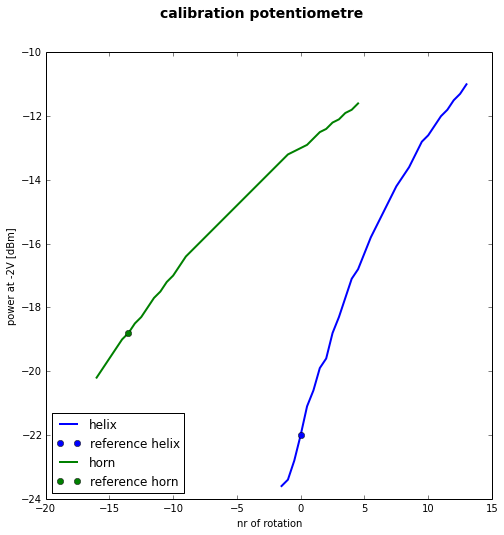

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run plotpotar.py

This give the anchor point as a function of the number of rotation on the resistor.
The two points (*reference* in the legend) at -13.5 for the horn and 0 for the helix are supposed to be the points where the resistor was set prior the installation.  
Knowing how the resistor was set at the installation, we will know the power at -2V at the output of the board,
and we can deduce the power over the whole dynamic range with the slope.

#Installation sum up

Here are some information that was in the installation note.

The most important number being the number of rotations of the adjustable resistor.

For the horn:

| name      | id  | zenith | azimuth | antenna_id | electronic_id | rotation | mean_beaseline |
|-----------|-----|--------|---------|------------|---------------|----------|----------------|
| Vieira    | 433 | 0      | 0       | 4          | 4             | 5        | 327.7          |
| Luis      | 422 | 20     | 210     | 1          | 1             | 4        | 352.2          |
| Orteguina | 431 | 20     | 270     | 9          | 9             | 5        | 354            |
| Popey     | 385 | 20     | 330     | 10         | 10            | 6        | 334.5          |
| Chape     | 384 | 20     | 30      | 5          | 5             | 13 (5+8) | 292.8          |
| Domo      | 427 | 20     | 90      | 3          | 3             | 4        | 335.8          |
| Juan      | 432 | 20     | 150     | 6          | 6             | 6        | 334.9          |

for the helix:

| name   | id  | zenith | azimuth | antenna_id | electronic_id | rotation | mean_beaseline |
|--------|-----|--------|---------|------------|---------------|----------|----------------|
| Santy  | 339 | 0      | 0       | 6          | 10            | 0        | 192            |
| Rula   | 313 | 20     | 210     | 2          | 2             | 0        | 275.7          |
| Nono   | 340 | 20     | 270     | 8          | 8             | -5       | 240.8          |
| Jorge  | 329 | 20     | 330     | 4          | 9             | 1        | 218.1          |
| Eva    | 330 | 20     | 30      | 3          | 3             | 0        | 250.6          |
| Gilda  | 334 | 20     | 90      | 11         | 7             | 0        | 312.8          |
| Gringa | 328 | 20     | 150     | 5          | 5             | 2        | 233.5          |


**PROBLEM with Nono** the number of rotation is -5 as written in the installtion note. However if we extrapolate the calibration curve of the helix resistor to -5 rotations we get something very different...  
We should look at the installation sheet to see if there was any remark at the installation.  
If we were to fit the calibration curve until -5 we would obtain something like:

P at -2V for r = -5 =  -29.2187027253


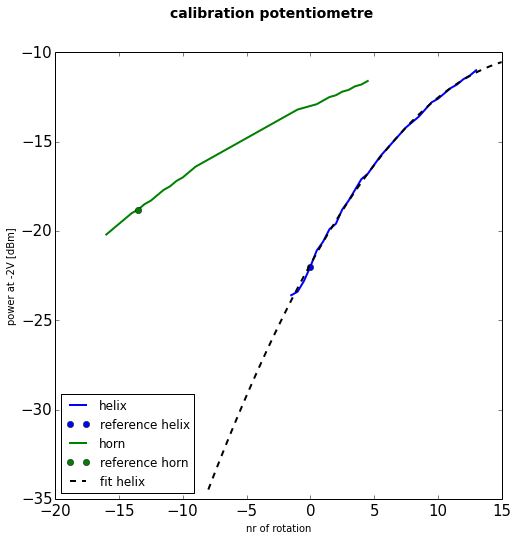

In [6]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run nonospecial.py

That would mean that Nono is around 7 dB below all the other antennas.

#Power calculation

## example

To get the measured power from the ADC we use the following formula:
\begin{equation}
    \rm k = \frac{P_{-2V} - P_{meas}}{-2 - V_{meas}}
\end{equation}
\begin{equation}
    \rm P_{meas} [dBm] = P_{at -2V} [dBm] + k \cdot (2+ V_{meas}) 
\end{equation}

where

\begin{equation}
    \rm V_{meas} = (ADC_{meas} \cdot \frac{-1}{511})
\end{equation}

**comment:** for the moment the number of rotation is not really clear because, the it is positive in one case and negative in the other. Also, I don't know what number was fixed before the installation.


Let's assume the nr of rotation was 0 before the installation, for most of the helix nothing was changed,
so for instance for Santy:

- $P_{at -2V}$ = -22dBm 
- k = -10.4 dB/V (cf thesis 1/(0.0234*4.1))
- for a level in ADC of 192 (cf installation note) $V_{meas} +2 = ( - 192/511) +2 = +1.625 V$
- $P_{meas}$ = -22 -10.4x1.625 = **-38.9 dBm**


**important comment: no uncertainties was accounted for**

##all antennas

We have from the installation report, all the values for the rotation of the resistor.
We also have the baseline at the installation. So we can look at the distribution of the 
two hexagons.

###distribution

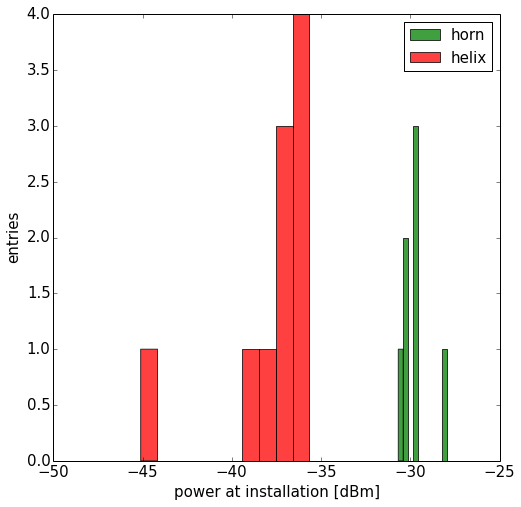

 helix detectors (in dBm):
Santy   -38.90
Rula   -37.20
Rula2   -37.20
Nono   -45.11
Jorge   -36.97
Eva   -37.71
Gilda   -36.45
Gringa   -35.66
Gringa2   -35.66
Gringa3   -35.66

 horn detectors (in dBm):
Vieira   -30.34
Luis   -30.35
Orteguina   -29.81
Popey   -29.81
Chape   -27.95
Domo   -30.68
Juan   -29.80


In [6]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotdist.py install

For the horn antennas most of the detector are around -30 dBm $\pm$ 1 dB, only Chape is 3 dB above.  
For the helix the distribution is more spread, and goes from almost -39dBm to -36dBm (if we don't account for Nono because of the remark written above)

### dependence in azimuth

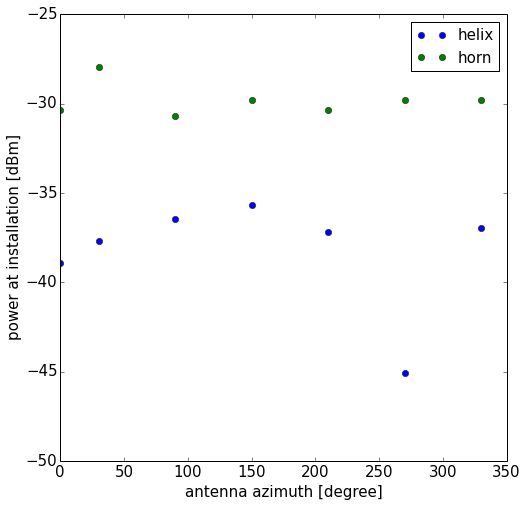

In [4]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotazimuth.py

Actually I didn't expect any azimuth dependence, but there seem to be some structure for the helix.

I don't really know, it is not clear to me, there are only 7 points !
But it would be interesting to check what is at 150 degrees.

# Expected power

Here we compute the expected power for the two setups.
These are mainly based on data sheet or simulated values.

\begin{equation}
\rm  P_{expected} = k_{B}\cdot (T_{ant} + T_{elec})G_{elec} \cdot \Delta \nu
\end{equation}

for the Helix:

- *LNA Wented ALN0120-42-5006:*
    - BW: 950-1450MHz (500MHz)
    - gain: 47-53 dB  (typical 50dB)
    - NF: 0.7dB (50K)
- *Antenna: helix*: Tant = 10K


for the Horn:

- *LNB Norsat 8115N:*
    - BW: 3.4 - 4.2GHz (800MHz)
    - gain: 64dB
    - NF: 0.22dB (15K)
- *Antenna: A-Info*: Tant= 5K

** ???? question: Is there a loss from the impedance adaptation 75-50 $\rm \Omega$ ???**

For both of the setup there is a filter Minicircuit SXBP-1430 with a loss in the band of 0.6dB
(the noise of the filter should be negligeable after the LNA)

In [30]:
import math
kb = 1.38e-23 
BWhel = 5e8
Thel = 10
Twenteq = 50
gwenteq = pow(10,5.1)

BWhorn = 8e8
Thorn = 10
Tnorsat = 15
gnorsat = pow(10,6.4)

gfilter = pow(10,-0.06)

Phelix = kb*(Thel + Twenteq)*gwenteq*gfilter*BWhel ## [W]
Phorn = kb*(Thorn + Tnorsat)*gnorsat*gfilter*BWhorn ## [W]

print 'expected power for the helix: P_helix = ' , "%.2f" % (10*math.log10(Phelix*1000)) ,' [dBm]'
print 'expected power for the horn: P_horn = ' , "%.2f" % (10*math.log10(Phorn*1000)) ,' [dBm]'


expected power for the helix: P_helix =  -43.43  [dBm]
expected power for the horn: P_horn =  -32.19  [dBm]


#more detailed calculation

Here we try to account for uncertainties in the calculation, in the measured and expected power.

## measured power

The measured power will be affected by the following uncertainties:

- on the board calibration (quite small in principle)
- on the number of rotation done at the installation
- on the baseline: we know there are some variation with time (temperature) of the baseline.
    (fixing ourselves at an electronic temperature of around 25C could be a solution)

### uncertainties on board calibration

The board for GIGAS are the same in terms of adaptation of the power detector signal.
That means we have:
\begin{equation}
    V_{EB} = - 4.1 \cdot V_{PD}
\end{equation}

The stability of the slope is in fact very good (cf chapter 4.2 of my thesis):

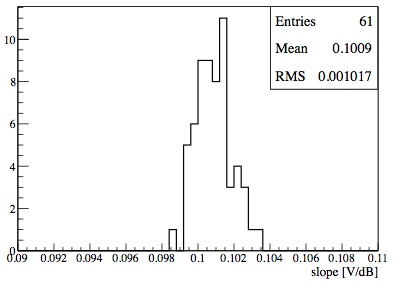

In [23]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/notes/')
from IPython.display import Image
Image(filename='slopedist.png')

We have 1% error on the slope ($k$ in the equation written above), and the order of magnitude of the voltage (2+Vmeas) is a few volt, that means the error on the power in dBm if we account for a mean value around 0.05 dB.  
I consider it as negligible.

###uncertainties on number of rotation

The error on the power given by the uncertainty on the number of rotation is simply given by the slope of the resistor calibration ($P_{at -2V}$ vs nr of rotation)

We first fit the calibration curve with a 2nd order polynomial and then get the error function with the coefficient of the fit. 
Here are the fitted curves:

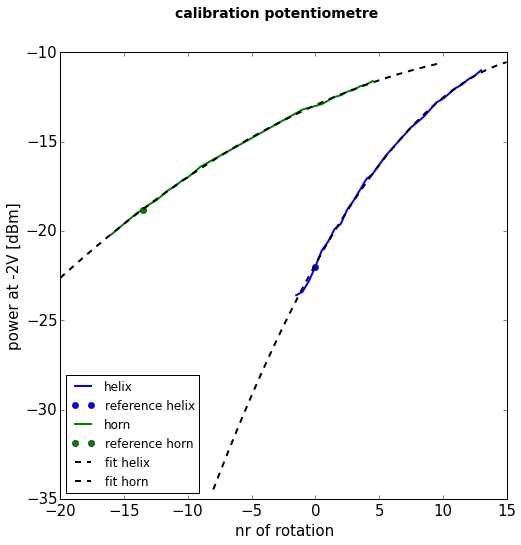

In [10]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run fitpotar.py

And the error we obtain if we estimate our uncertainty to 0.25 rotation

In [4]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run errorrotation.py 0.25

station:  Vieira error =  0.11
station:  Luis error =  0.12
station:  Orteguina error =  0.11
station:  Popey error =  0.11
station:  Chape error =  0.08
station:  Domo error =  0.12
station:  Juan error =  0.11


station:  Santy error =  0.32
station:  Rula error =  0.32
station:  Rula2 error =  0.32
station:  Nono error =  0.41
station:  Jorge error =  0.30
station:  Eva error =  0.32
station:  Gilda error =  0.32
station:  Gringa error =  0.29
station:  Gringa2 error =  0.29
station:  Gringa3 error =  0.29


### time (temperature) dependence of the baseline

Here we need to look at the monitoring data to obtain some distribution of the baseline over a certain range of time.  
We first look at each station baseline and we will decide some cut to evaluate the average baseline.  
We take here an example for one station Santy (the plots for the other station are in appendix)

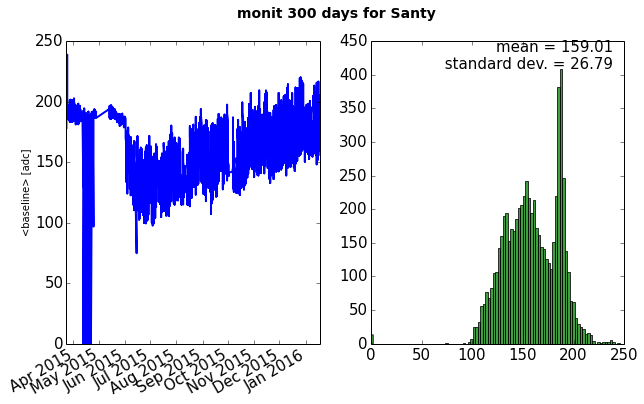

In [18]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Santy

Here for instance we decide to keep only the data after June 2015.  
We get:

no stop/ start


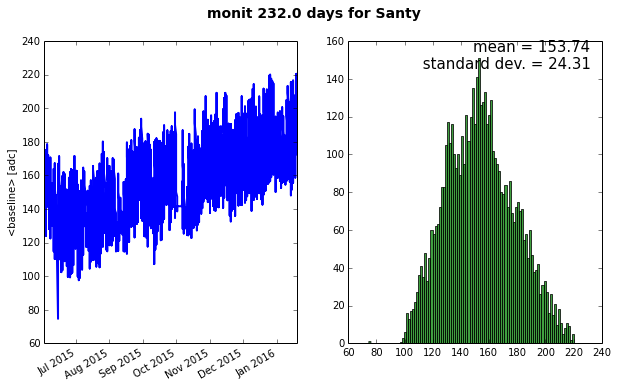

In [6]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getcutmonit.py Santy 01/06/2015 no

But there is still some temperature correction to do.  
If we correct the temperature evolution and we set the baseline to 25 degree (we can consider that the other data we will compare to like data sheet are taken at 25deg.) we reduce quite a lot the spread around the mean:

no stop/ start


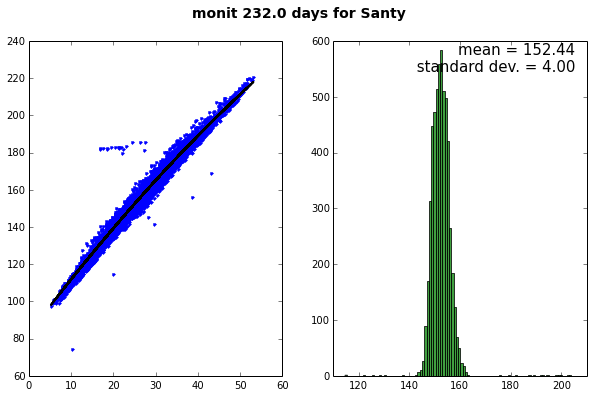

In [39]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Santy 01/06/2015 no

**comment:**
- most of the detectors have several periods with baseline jumps in the last 300 days.
- some helix have very little variation with temperature (Gilda, Gringa)
- Orteguina and Luis have a raise at the same time (the month of August)
- the monitoring would need another dedicated note !
- For my purpose I decided to keep one or several periods depending on the case

**chosen values**

For the horn:

| name      | mean_beaseline | std_baseline |
|-----------|----------------|--------------|
| Vieira    | 351.9          | 27           |
| Luis      | 388.2          | 19           |
| Orteguina | 382.7          | 16.2         |
| Popey     | 360.6          | 17.9         |
| Chape     | 348.9          | 12.7         |
| Domo      | 379.4          | 20.9         |
| Juan      | 361.2          | 15.2         |

for the helix:

| name   | mean_beaseline |std_baseline |
|--------|----------------|-------------|
| Santy  | 152.4          | 4           |
| Rula1  | 290.2          | 3.1         |
| Rula1  | 261            | 2.3         |
| Nono   | 228.4          | 8.4         |
| Jorge  | 193.9          | 4.7         |
| Eva    | 277.2          | 2.9         |
| Gilda  | 332.6          | 5.4         |
| Gringa | 206.3          | 2.2         |
| Gringa2| 197.1          | 5.2         |
| Gringa3| 224.8          | 1.8         |


Now the new distribution of power for a detector at 25 degree:

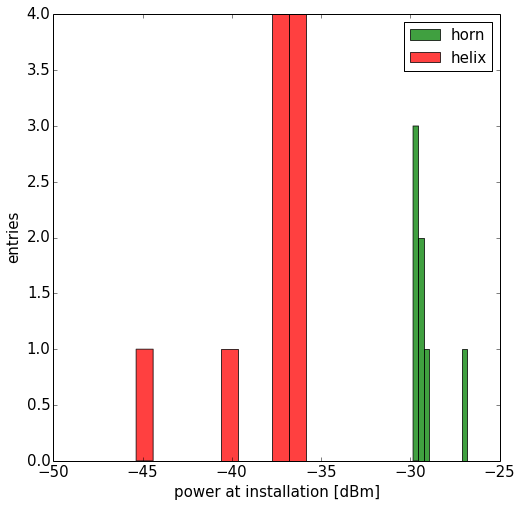

 helix detectors (in dBm):
Santy   -39.70  +/-  0.08
Rula   -36.91  +/-  0.06
Rula2   -37.50  +/-  0.05
Nono   -45.36  +/-  0.17
Jorge   -37.46  +/-  0.10
Eva   -37.17  +/-  0.06
Gilda   -36.04  +/-  0.11
Gringa   -36.21  +/-  0.04
Gringa2   -36.40  +/-  0.11
Gringa3   -35.83  +/-  0.04

 horn detectors (in dBm):
Vieira   -29.85  +/-  0.55
Luis   -29.61  +/-  0.39
Orteguina   -29.23  +/-  0.33
Popey   -29.28  +/-  0.36
Chape   -26.81  +/-  0.26
Domo   -29.79  +/-  0.42
Juan   -29.26  +/-  0.31


In [18]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotdist.py monit

The power of the horns are all around -29.5 dBm $\pm$ 0.3 dB except Chape.  
The helix are still quite dispersed, from  -36 to -39.7 and Nono is around -45dBm.

### Combined result

We keep the numbers found above for the average power and we combine the error from the rotation and from the baseline rms.  
The error are combined quadratically after linearization (even if the difference with brutal estimation in log is not very different because the error are small)

Vieira : err rotation =  0.11  error baseline = 0.55  error tot =  0.56
Luis : err rotation =  0.12  error baseline = 0.39  error tot =  0.40
Orteguina : err rotation =  0.11  error baseline = 0.33  error tot =  0.35
Popey : err rotation =  0.11  error baseline = 0.36  error tot =  0.38
Chape : err rotation =  0.08  error baseline = 0.26  error tot =  0.27
Domo : err rotation =  0.12  error baseline = 0.42  error tot =  0.44
Juan : err rotation =  0.11  error baseline = 0.31  error tot =  0.33
Santy : err rotation =  0.32  error baseline = 0.08  error tot =  0.33
Rula : err rotation =  0.32  error baseline = 0.06  error tot =  0.33
Rula2 : err rotation =  0.32  error baseline = 0.05  error tot =  0.33
Nono : err rotation =  0.41  error baseline = 0.17  error tot =  0.44
Jorge : err rotation =  0.30  error baseline = 0.10  error tot =  0.32
Eva : err rotation =  0.32  error baseline = 0.06  error tot =  0.33
Gilda : err rotation =  0.32  error baseline = 0.11  error tot =  0.34
Gringa :

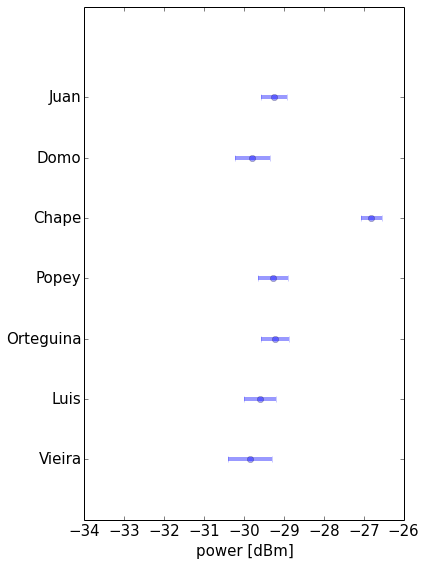

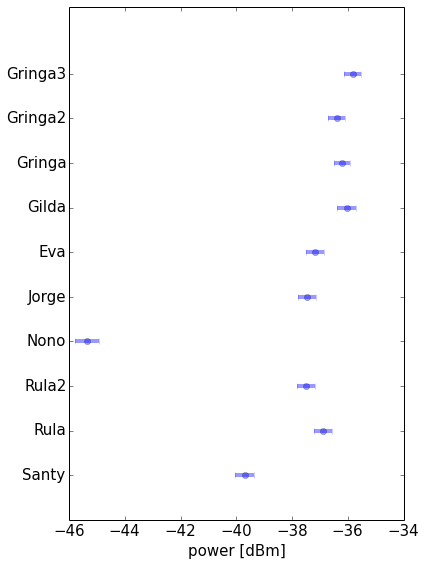

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run combineerror.py 0.25

## Expected power (more precise)

The main approximation done in the previous calculation is the treatement of the gain on the bandwidth.
To correct that we need to replace the factor $G\cdot BW$ by $\int_{0}^{\inf} G(\nu) d\nu$

###Helix

The RF chain for the Helix is:
- Wented ALN0120-42-5006
- a cable (~few meters)
- band pass filter minicircuit CBP-B1230C+
- high pass filter on BiasT minicircuit HFCN-1000+

We first take a look at each element separately and we will combine them later, to obtain the correct bandwidth.

For the amplifier is the wenteq, Jacques measured the gain of one LNA (not installed one) with the network analyzer, and we also have the 
calibration curve given by the vendor.
(the extraction of the data from the vendor was done using WebPlotDigitizer, because only a 2 or 3 values were given and the curve on paper)  
The two curves are very close (at most 0.5dB of difference)

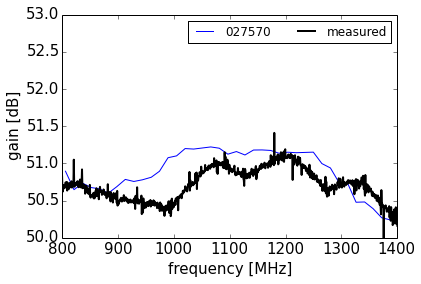

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotwenteq.py

And here are the gain curves of the installed LNA:

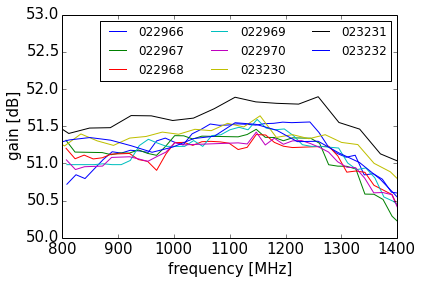

In [5]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotwenteq.py

And the noise figure:

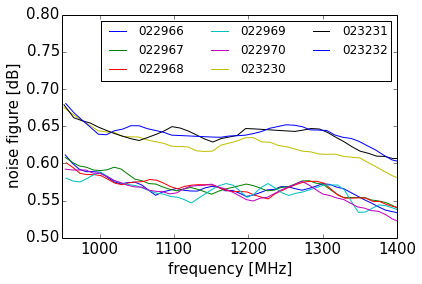

In [11]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotwenteq.py

**Filters**  
there are two filters:
one is directly on the board, and one is one the Bias T for the amplifier.
They don't play the same role in the calculation, because the filter on the board is already accounted for in the 
calibration (i.e. the setting of the reference point described in section 2.) but the filter on the bias T is not.
So in the expected power calculation, we need to account:

- for the bandwidth reduction and the losses normalized to the reference frequency (1.4GHz) for the board filter
- for the bandwith reduction and the total losses for the bias T filter.


*Board filter:*
we have the constructor data for this filter, here is the attenuation normalized to the attenuation at 1.4GHz.

attenuation at  1400  =  -1.41


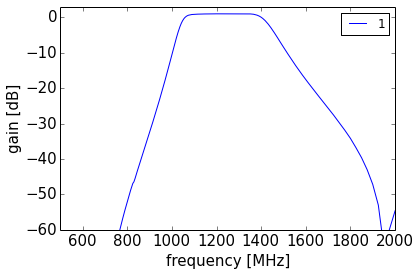

In [20]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotfilter.py

attenuation at  1400  =  -1.41


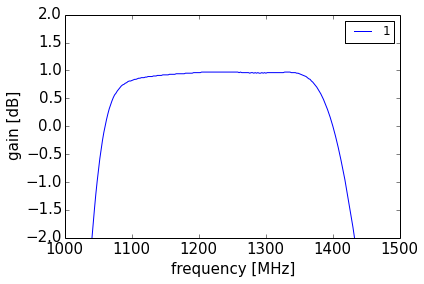

In [23]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotfilter.py

When we include this into the LNA gain we obtain:

sum dB =  138.200435131
sum dB =  138.00844458
sum dB =  138.004684673
sum dB =  138.098564487
sum dB =  138.00593368
sum dB =  138.247112749
sum dB =  138.555109864
sum dB =  138.143011236


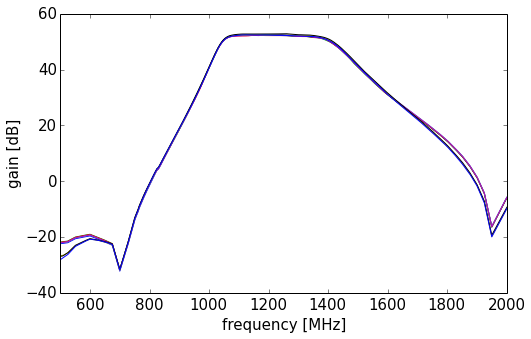

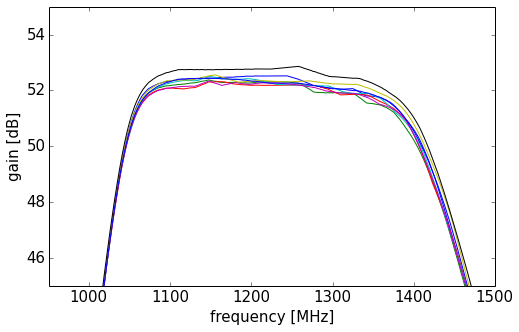

In [5]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run combinefilterlna.py

So we "gain" around 0.5 to 1 dB because the calibration was done at 1.4GHz were the loss is a bit larger than for the rest of the band.

*Bias T filter:* The filter on the biasT is not accounted for in the calibration so we need account for the total loss (not normalized like before).  
We have in hand a measurement from Jacques, and data from constructor.  
The data from Jacques are taken after the electronics board, and we retrieve the attenuation of the filter by comparing a measuremement with the board only and with the board and biasT (so it is a difference of voltage and we multiply by 10.4 to get the difference in dB):

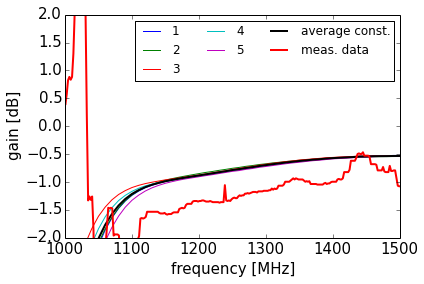

In [28]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotfilter.py

So here we have a little difference of around 0.5dB in the passed band.

*cable:* Jacques also added the cable (which is between the LNA and the board):

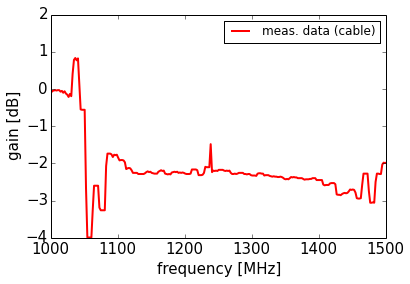

In [29]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotcable.py

If we combine all these element we can plot the complete bandwidth (for the different LNA):

sum dB =  134.768879863
sum dB =  134.585197805
sum dB =  134.581805995
sum dB =  134.670007764
sum dB =  134.583285043
sum dB =  134.822879025
sum dB =  135.124259672
sum dB =  134.713964305


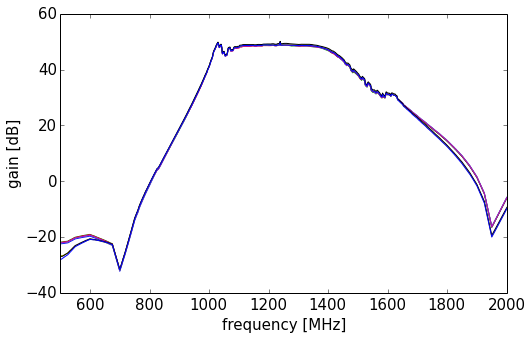

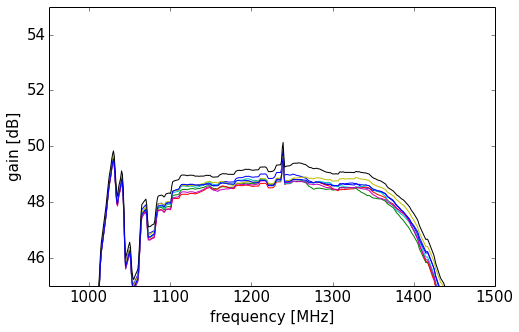

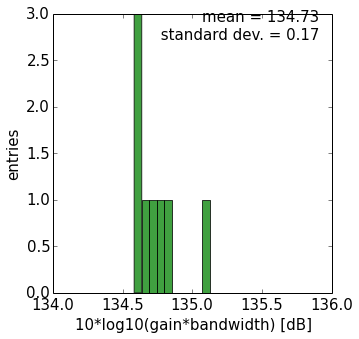

In [6]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run combinefilterlna.py

So when we account for all the attenuations, we obtain something quite lower than what we had before 
(before we had 51dB + 10.log10(500e6) ~ 138 dB) and now we are at ~ 134 dB. This comes mainly from the attenuation of the cable and filters, and secondly because the bandwidth is not exactly 500MHz.

###Horn

For the horn we don't have a calibration from the constructor, but we have the measurement done in anechoic chamber at IMEP Grenoble.
(cf report "130206 Rapport LPSC.pdf" sent from Patrick or Corinne)  
What we have in hand is the total gain (horn + LNB) and only the horn gain in dBi (i.e. normalized to unity I guess).
But assuming this gain is close to the effective gain, we can deduce the LNB gain:

sum =  3.67404860103e+15
sum dB =  155.651448969


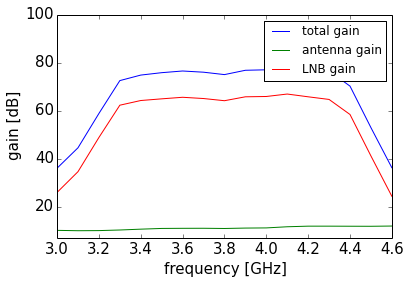

In [29]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotnorsat.py

The C band setup has a filter on the board (SX-BP-1430-75) and the cable attenuation.
*filter on the board:* we need to do the same thing than with the helix, i.e. we normalized the attenuation with the attenuation at the reference frequency (also 1.4GHz), this gives:

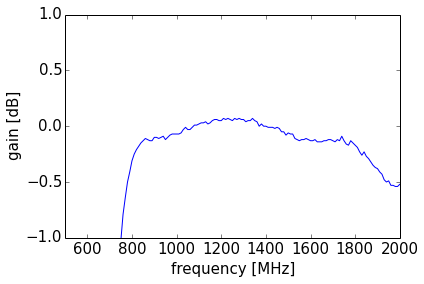

In [35]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run plotfilter.py boardhorn

The attenuation of the F cable was also measured, it is around 1dB.
If we combine the filter and the cable with the gain of the norsat LNB (first we have to reverse and translate the frequencies w.r.t. 5150 MHz, the LNB thing)

attenat ref =  [-0.72]
sum =  3.02067724121e+15
sum dB =  154.801043235


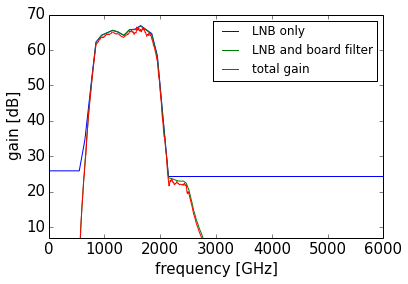

In [7]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run combinefilterlnahorn.py

attenat ref =  [-0.72]
sum =  3.02067724121e+15
sum dB =  154.801043235


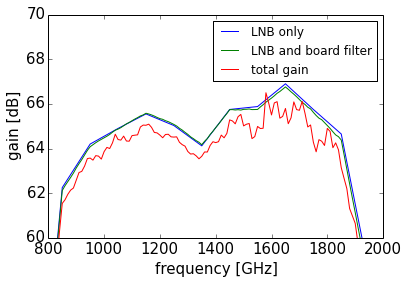

In [8]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run combinefilterlnahorn.py

If we recalculate the expected power for the two setups:

In [9]:
import math
kb = 1.38e-23 
Thel = 10
Twenteq = 50
#now the gain and the bandwidth are combined
GBWwenteq = pow(10,13.47)
#GBWwenteq = pow(10,13.77)


Thorn = 10
Tnorsat = 15
#GBWnorsat = pow(10,15.57)
GBWnorsat = pow(10,15.48)

gfilter = pow(10,0)
#gfilter = pow(10,0.06)


Phelix = kb*(Thel + Twenteq)*GBWwenteq*gfilter ## [W]
Phorn = kb*(Thorn + Tnorsat)*GBWnorsat*gfilter ## [W]

print 'expected power for the helix: P_helix = ' , "%.2f" % (10*math.log10(Phelix*1000)) ,' [dBm]'
print 'expected power for the horn: P_horn = ' , "%.2f" % (10*math.log10(Phorn*1000)) ,' [dBm]'

expected power for the helix: P_helix =  -46.12  [dBm]
expected power for the horn: P_horn =  -29.82  [dBm]


So the final comparison looks like that:

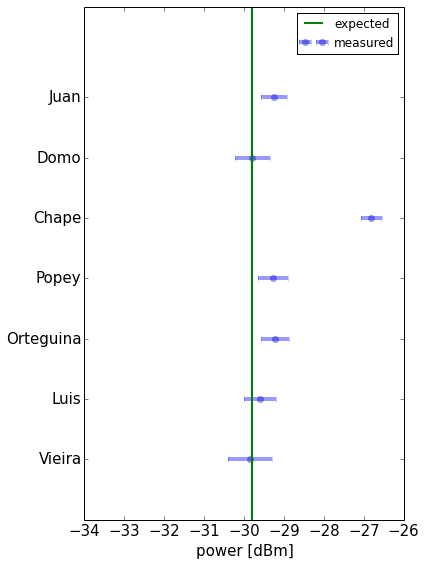

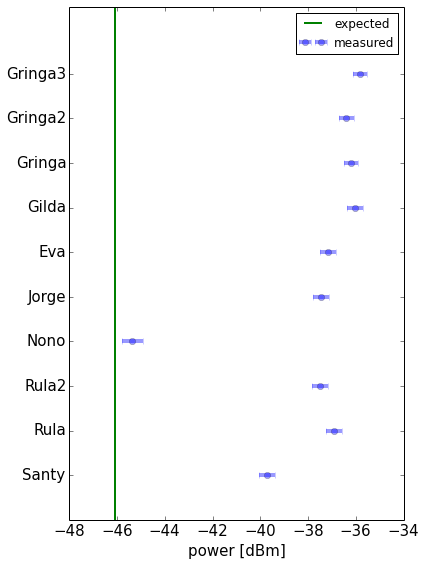

In [2]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run combineerror.py 0.25

#conclusion

- the horn antenna detector are very more or less OK, they are still 2 dB above of what is expected (I am still uncertain about the impedance adaptation loss)
- the helix antenna (this is not new) are noisier than expected by around 7 dB.
- there seem to be a trend in the azimuth plot

- This is still a quite rough calculation:
    - for the measurement, I haven't checked the baseline in the monitoring on the long term
    - for the expectation, the numbers are quite rough (we could integrated over the bandwidth instead of taking one gain over the BW)

#Appendix

## monitoring plots:

**- Vieira**

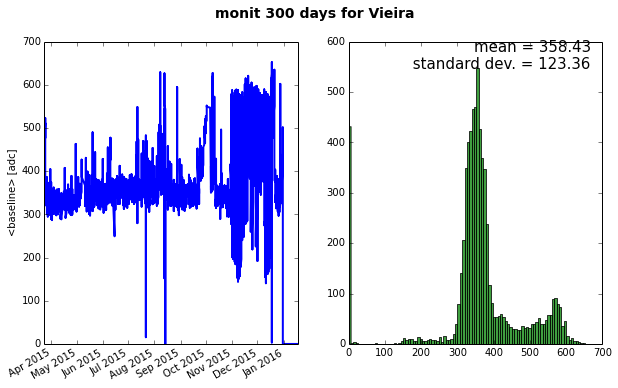

In [2]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Vieira

So we cut between april 2015 and mid september 2015:

stop/ start


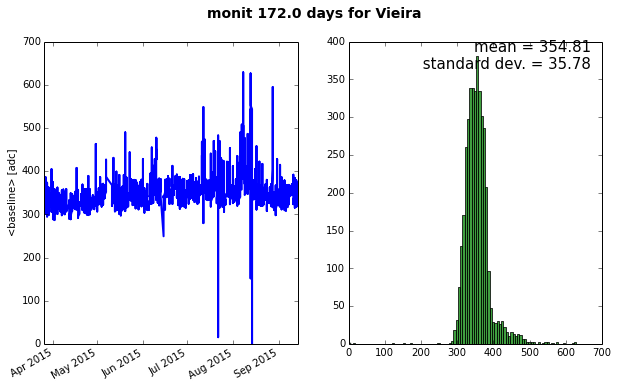

In [69]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getcutmonit.py Vieira 01/03/2015 15/09/2015

stop/ start


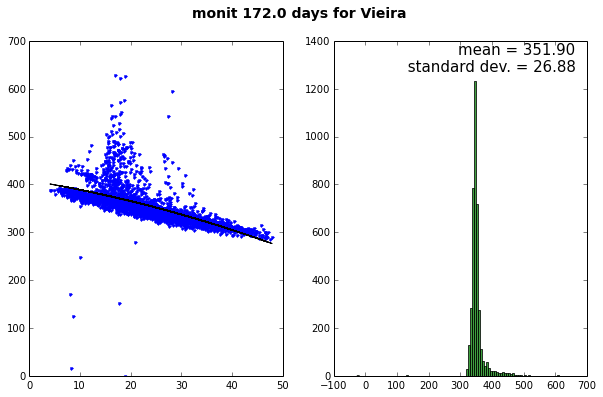

In [71]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Vieira 15/03/2015 15/09/2015

**- Luis**

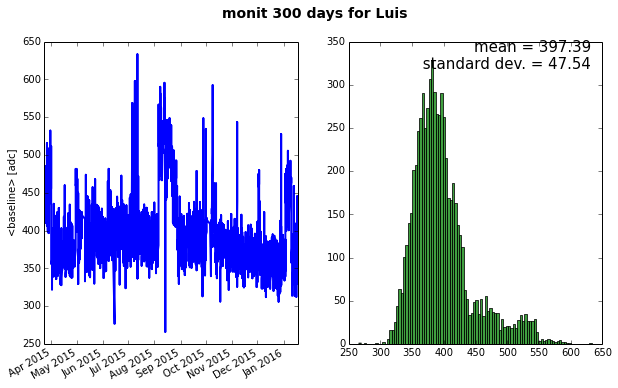

In [55]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Luis

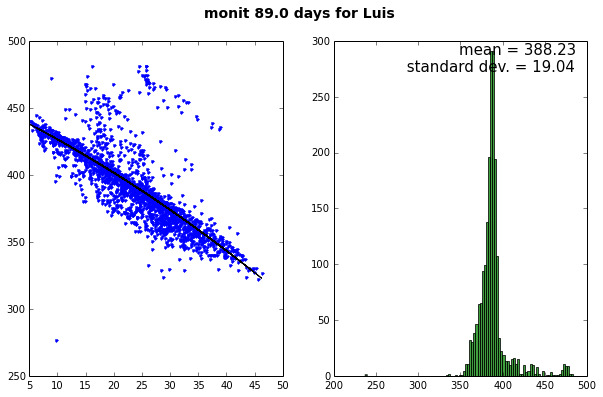

In [80]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Luis  01/04/2015 01/07/2015

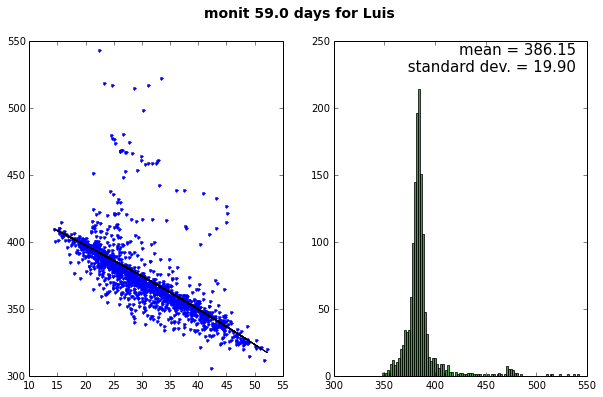

In [81]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Luis  15/10/2015 15/12/2015

The mean value before and after are consistent.

**- Orteguina **

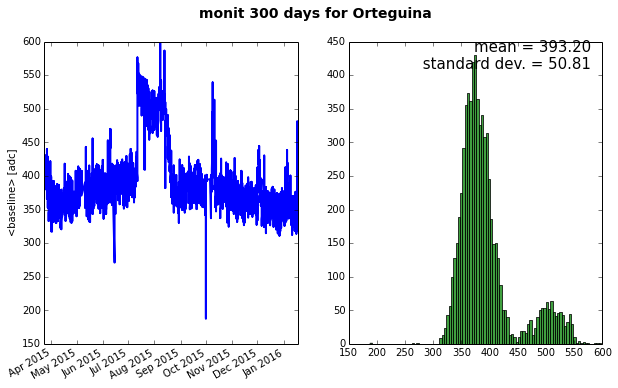

In [82]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Orteguina

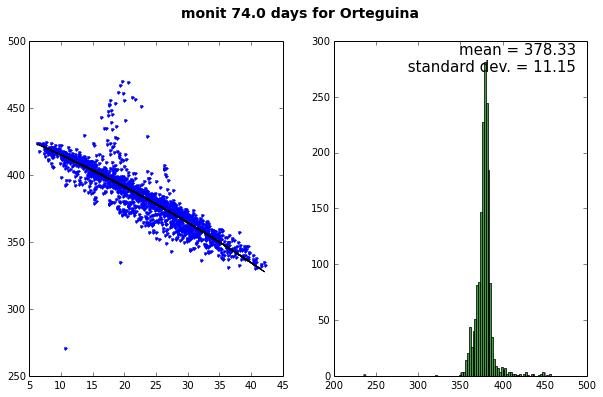

In [91]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Orteguina  15/04/2015 30/06/2015

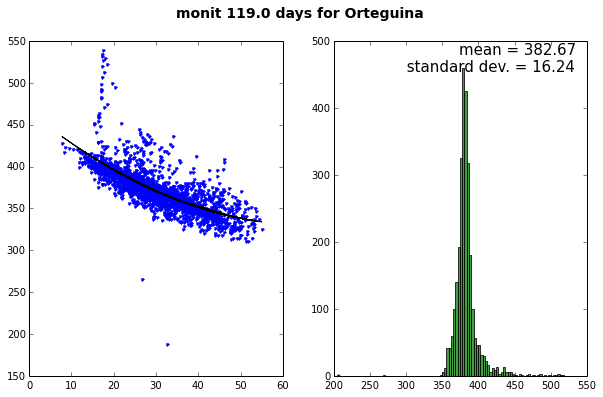

In [92]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Orteguina  01/09/2015 31/12/2015

The mean value before and after are consistent.

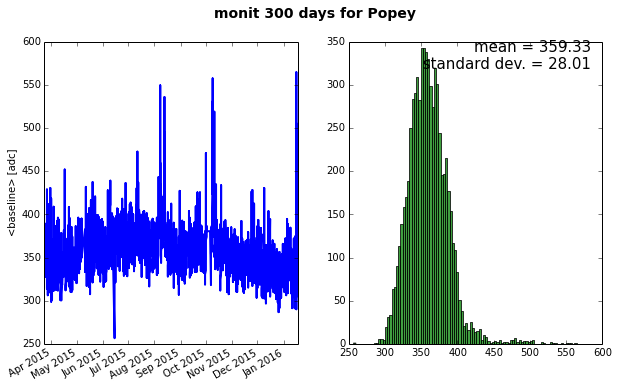

In [93]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Popey

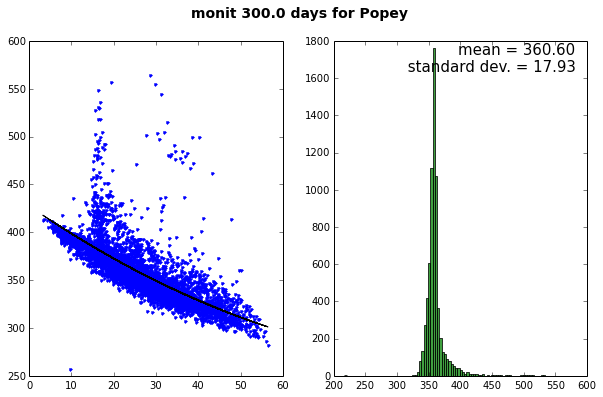

In [97]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Popey no no

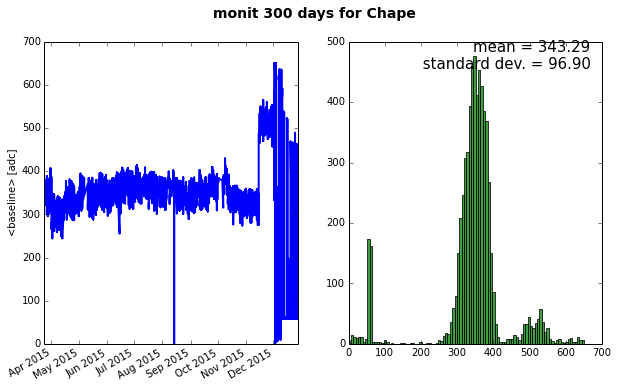

In [98]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Chape

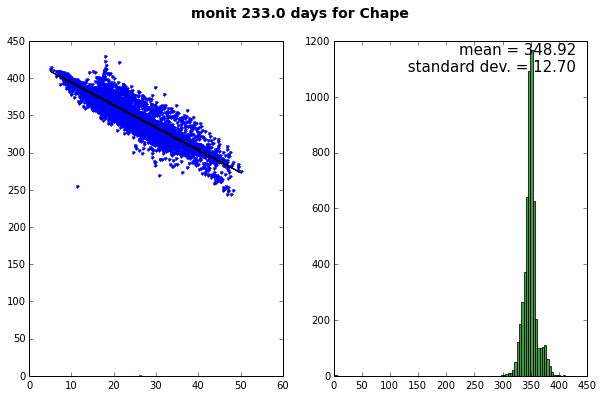

In [99]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Chape no 15/11/2015

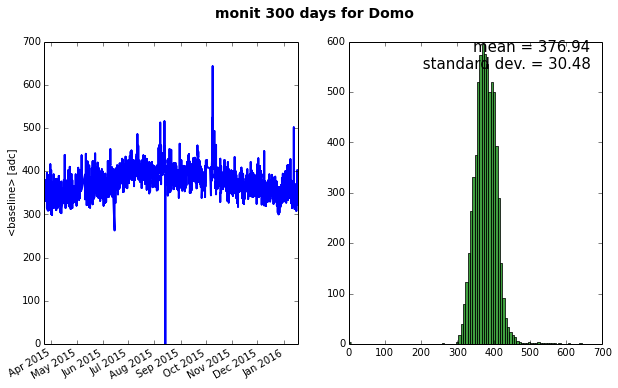

In [100]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Domo

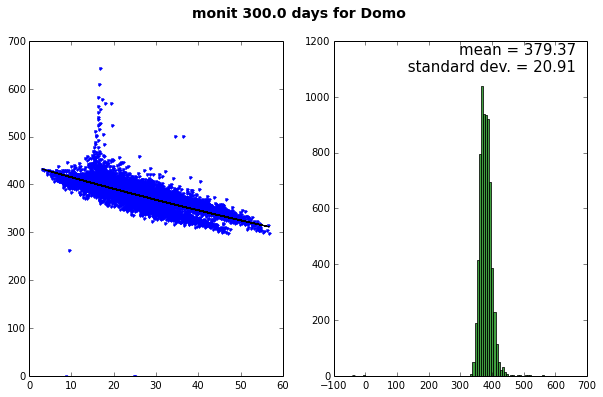

In [101]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Domo no no

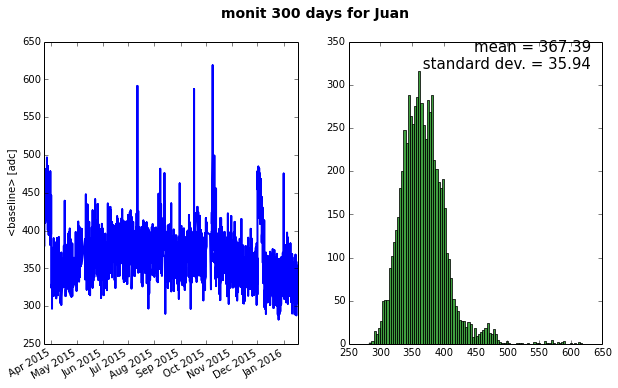

In [102]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Juan

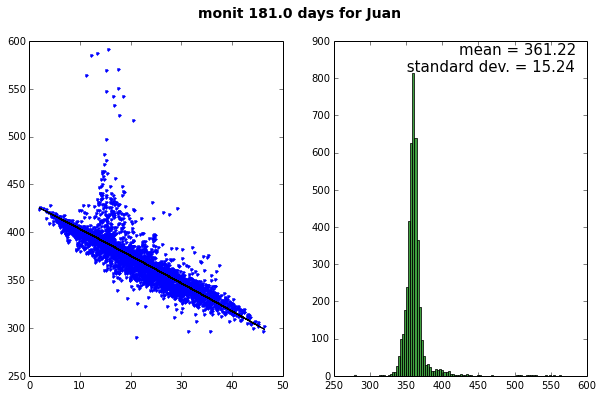

In [106]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Juan 01/04/2015 01/10/2015

**- Santy **

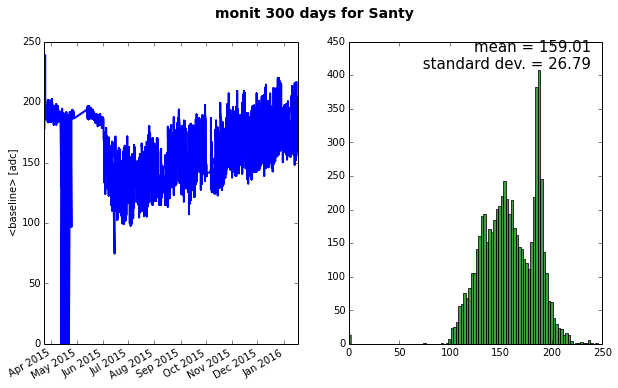

In [107]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Santy

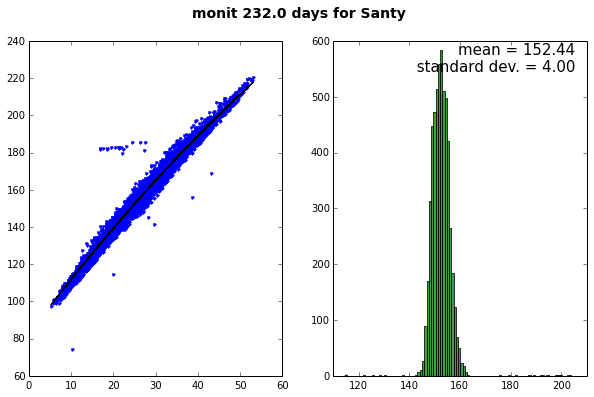

In [108]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Santy 01/06/2015 no

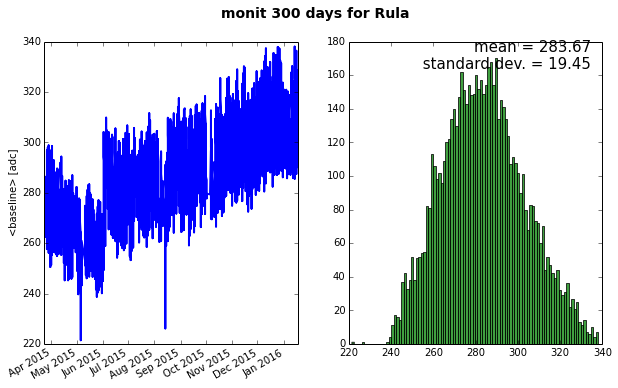

In [109]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Rula

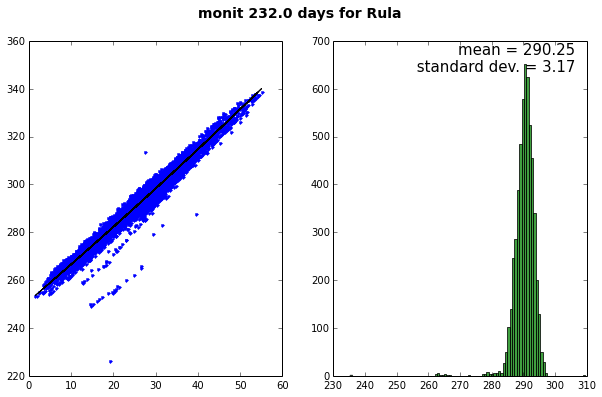

In [113]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Rula 01/06/2015 no

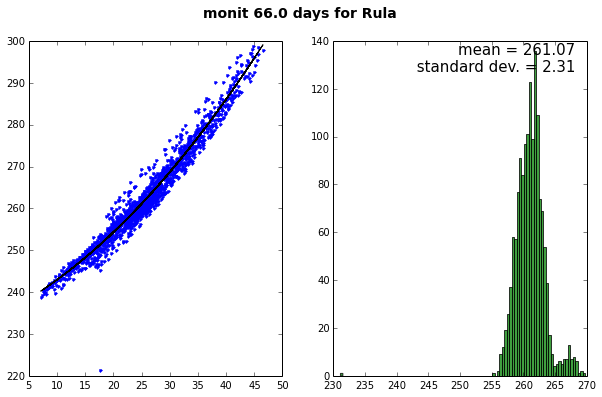

In [114]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Rula no 01/06/2015

**For Rula there are really two different time period...  
Hard to know which one to pick** 

**- Nono**

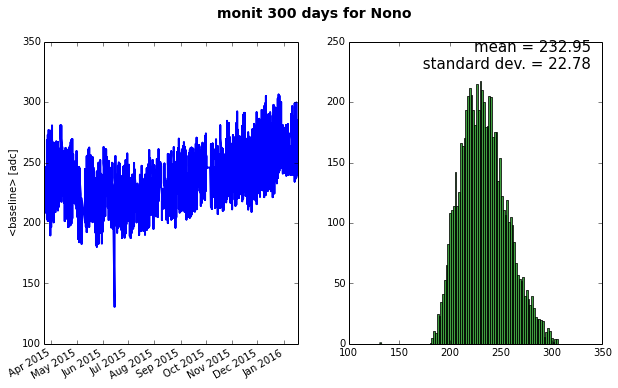

In [115]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Nono

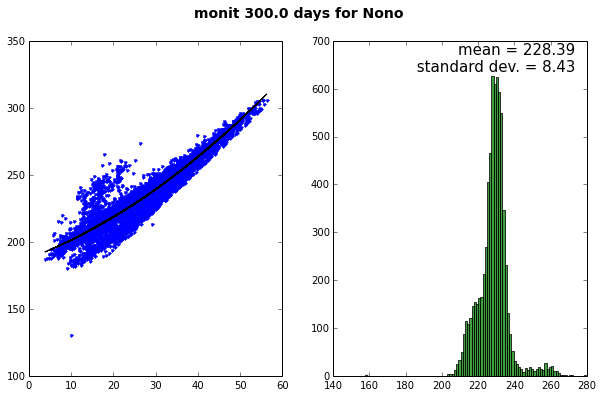

In [128]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Nono no no

**- Jorge**

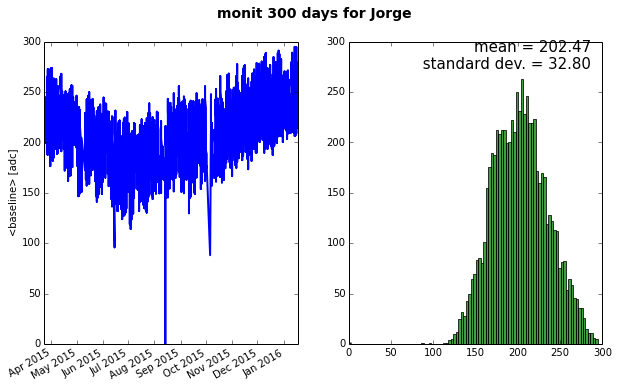

In [129]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Jorge

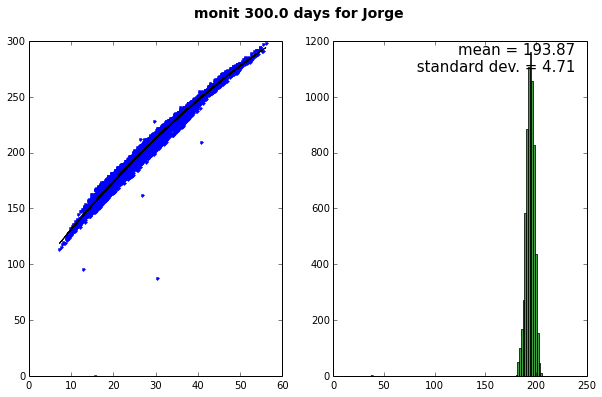

In [130]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Jorge no no

**- Eva**

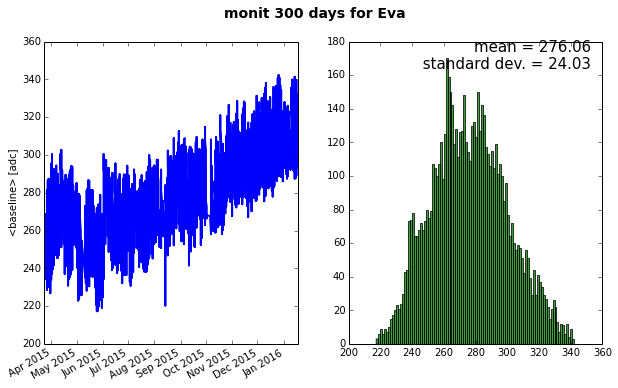

In [131]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Eva

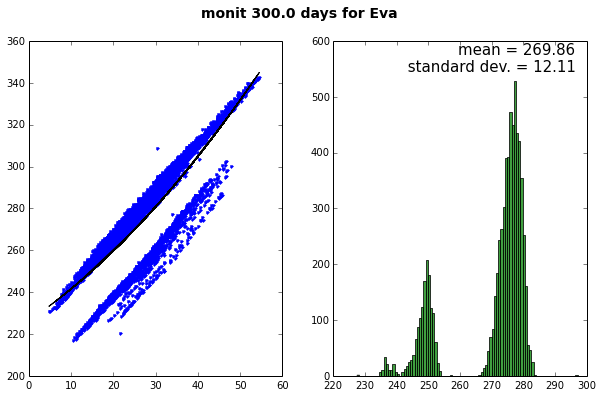

In [136]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Eva no no

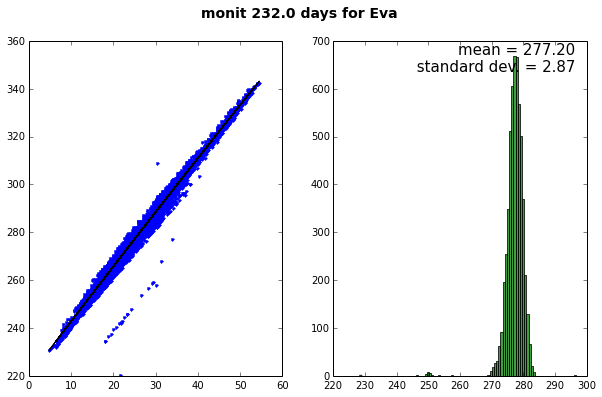

In [135]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Eva 01/06/2015 no

Here also we have distinct periods.

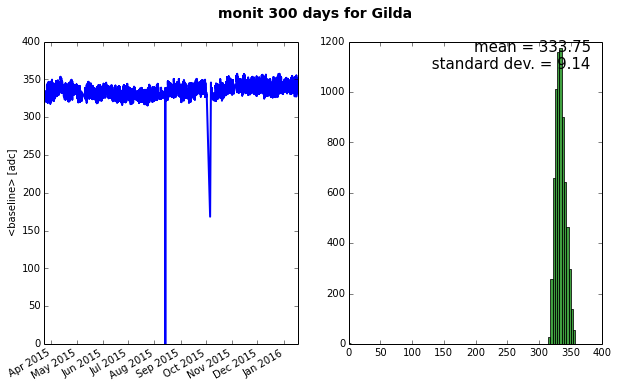

In [138]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Gilda

Gilda without temperature correction has already quite narrow distribution. 
Which is not very good sign...

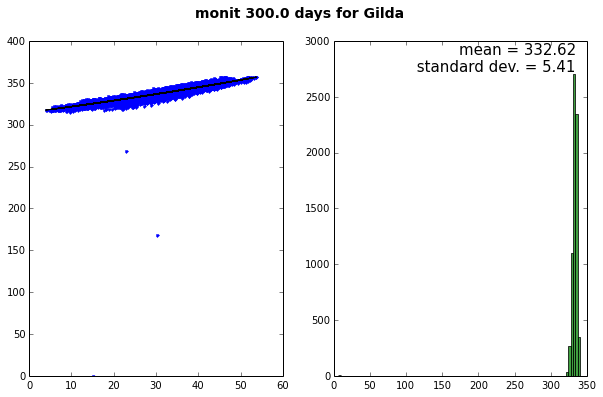

In [140]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Gilda no no

**- Gringa **

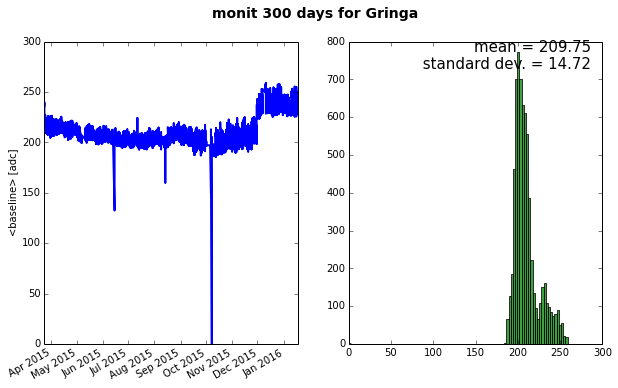

In [141]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/test/')
%run readmonit.py Gringa

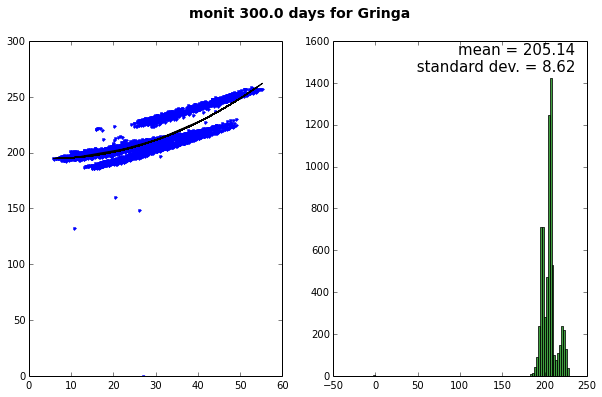

In [142]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Gringa no no

So here we have three different periods:

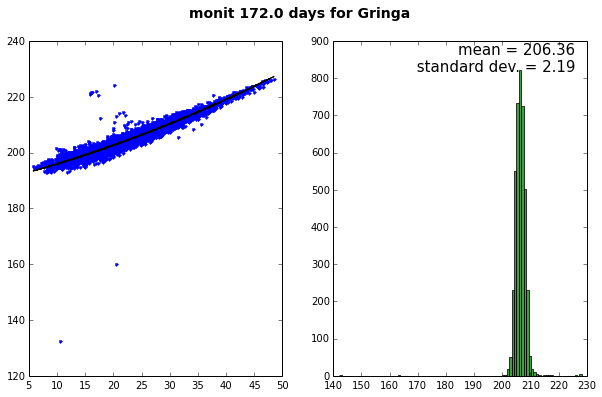

In [143]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Gringa no 15/09/2015

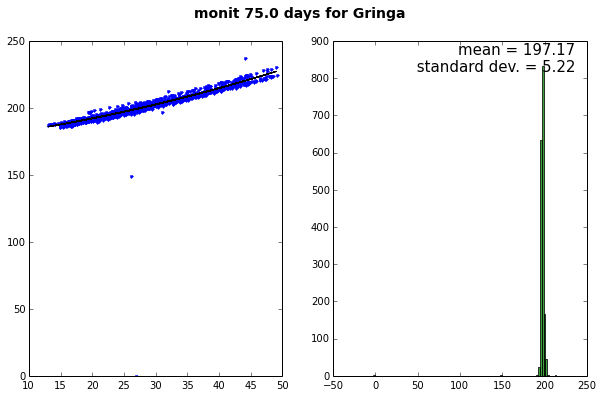

In [144]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Gringa 15/09/2015 01/12/2015

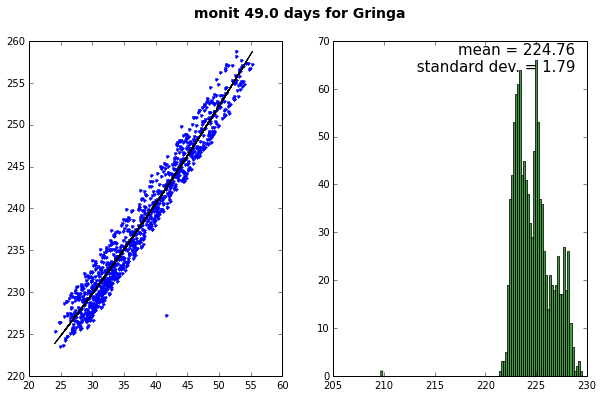

In [145]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/calibration/script/analysis/')
%run getmonitfit.py Gringa 01/12/2015 no